In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# here we are importing important libraries


In [4]:
#pip install --ignore-installed --upgrade tensorflow

In [5]:
#!pip install pandas_datareader

In [6]:
#!pip install keras
#!pip install tensorflow

In [7]:
import math
#import tensorflow as tf
import pandas_datareader as web
import matplotlib.dates as mdates
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('E:\stock\TESLA.csv')

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data.set_index('Date', inplace=True)

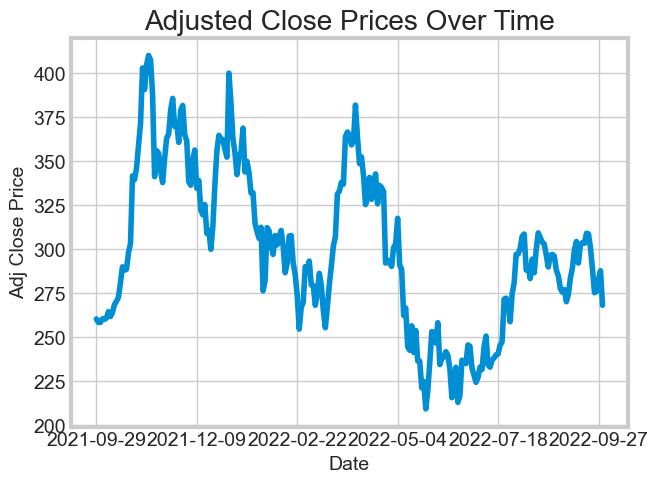

In [14]:
# here we are visualising of closing price
data['Adj Close'].plot()
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid(True)
plt.show()

In [15]:
#Creating a new dataframe with only the 'Close' column
data = data.filter(['Adj Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

203

In [16]:
#features = ['Open','High','Low','Volume']
#output_var = pd.DataFrame(data['Adj Close'])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.25450771],
       [0.24481932],
       [0.24438723],
       [0.25487331],
       [0.25331109],
       [0.25690063],
       [0.27494812],
       [0.261454  ],
       [0.27217286],
       [0.29507268],
       [0.30397996],
       [0.31601167],
       [0.35707523],
       [0.40207733],
       [0.39237221],
       [0.39491484],
       [0.44177813],
       [0.4678354 ],
       [0.65924383],
       [0.64855829],
       [0.68084754],
       [0.74595763],
       [0.80737852],
       [0.96457004],
       [0.90376396],
       [0.97332776],
       [1.        ],
       [0.98700461],
       [0.88870793],
       [0.65698373],
       [0.73085169],
       [0.72347315],
       [0.67346901],
       [0.64018276],
       [0.70888238],
       [0.76584956],
       [0.77809716],
       [0.84569998],
       [0.87862062],
       [0.79911922],
       [0.81070211],
       [0.75406737],
       [0.84558374],
       [0.85849606],
       [0.77580389],
       [0.75852093],
       [0.64280846],
       [0.632

In [18]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.25450771, 0.24481932, 0.24438723, 0.25487331, 0.25331109,
       0.25690063, 0.27494812, 0.261454  , 0.27217286, 0.29507268,
       0.30397996, 0.31601167, 0.35707523, 0.40207733, 0.39237221,
       0.39491484, 0.44177813, 0.4678354 , 0.65924383, 0.64855829,
       0.68084754, 0.74595763, 0.80737852, 0.96457004, 0.90376396,
       0.97332776, 1.        , 0.98700461, 0.88870793, 0.65698373,
       0.73085169, 0.72347315, 0.67346901, 0.64018276, 0.70888238,
       0.76584956, 0.77809716, 0.84569998, 0.87862062, 0.79911922,
       0.81070211, 0.75406737, 0.84558374, 0.85849606, 0.77580389,
       0.75852093, 0.64280846, 0.63290403, 0.70393024, 0.73253014,
       0.62424596, 0.64623186, 0.56211045, 0.54898208, 0.57803066,
       0.49648521, 0.50587448, 0.45164939, 0.51577891, 0.63267141])]
[0.7292728885224198]

[array([0.25450771, 0.24481932, 0.24438723, 0.25487331, 0.25331109,
       0.25690063, 0.27494812, 0.261454  , 0.27217286, 0.29507268,
       0.30397996, 0.31601167, 0.357

In [19]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#X_test, y_train = np.array(X_test), np.array(y_train)

In [20]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [21]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [22]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# here we are training the model
#model.fit(x_train, y_train, batch_size=1, epochs=200,verbose=1, shuffle=False, validation_data=(X_test, y_test))

In [24]:
# Model Training
#history = model.fit(X_train, y_train, epochs=200, batch_size=4, verbose=1, shuffle=False, validation_data=(X_test, y_test))

In [25]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [26]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [27]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [28]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=200,verbose=1, shuffle=False, validation_data=(x_test, y_test))

Epoch 1/200

143/143 [==============================] - 7s 21ms/step - loss: 0.0340 - val_loss: 84226.7734
Epoch 2/200
143/143 [==============================] - 2s 17ms/step - loss: 0.0349 - val_loss: 84225.3984
Epoch 3/200
143/143 [==============================] - 3s 18ms/step - loss: 0.0376 - val_loss: 84226.8594
Epoch 4/200
143/143 [==============================] - 2s 17ms/step - loss: 0.0396 - val_loss: 84209.4922
Epoch 5/200
143/143 [==============================] - 3s 18ms/step - loss: 0.0399 - val_loss: 84203.9531
Epoch 6/200
143/143 [==============================] - 2s 17ms/step - loss: 0.0363 - val_loss: 84202.5000
Epoch 7/200
143/143 [==============================] - 2s 16ms/step - loss: 0.0297 - val_loss: 84190.2969
Epoch 8/200
143/143 [==============================] - 2s 16ms/step - loss: 0.0221 - val_loss: 84169.0469
Epoch 9/200
143/143 [==============================] - 3s 18ms/step - loss: 0.0157 - val_loss: 84148.6562
Epoch 10/200
143/143 [=======================

In [30]:
print(x_train.shape)
print(x_test.shape)

(143, 60, 1)
(50, 60, 1)


In [31]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

2/2 [==============================] - 1s 18ms/step


In [32]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

20.754598692766464

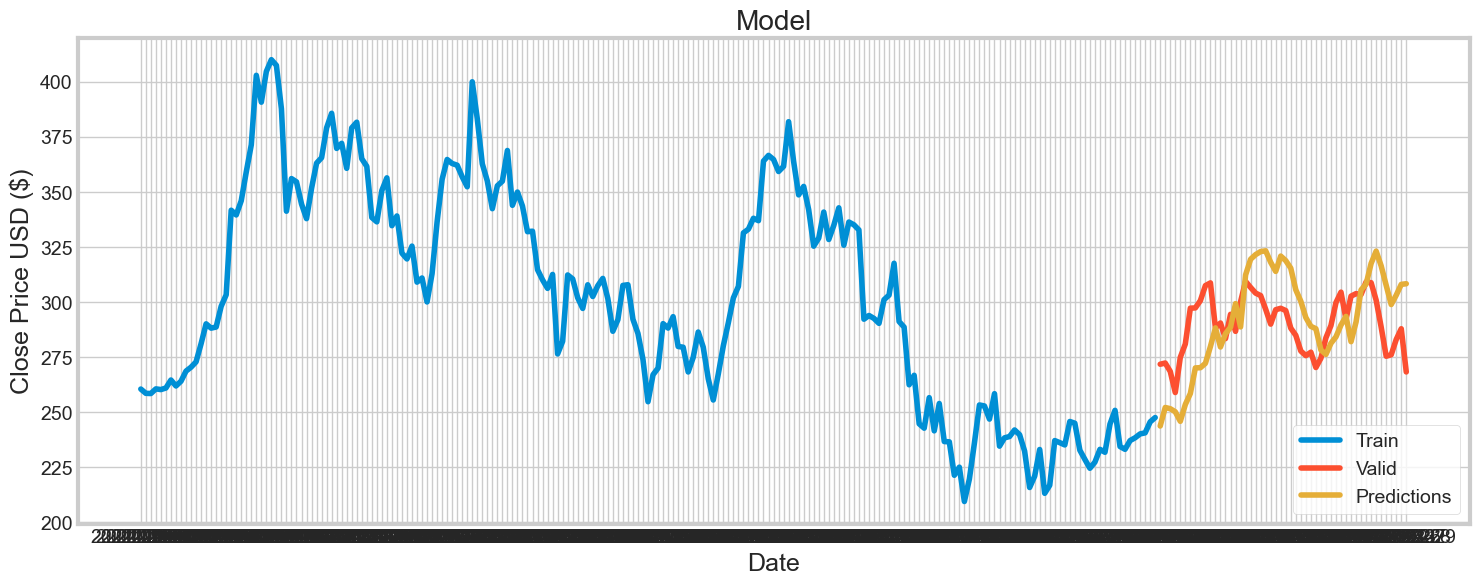

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [34]:
print(valid)

             Adj Close  Predictions
Date                               
2022-07-21  271.706665   243.660431
2022-07-22  272.243347   252.058563
2022-07-25  268.433319   251.509171
2022-07-26  258.859985   250.124176
2022-07-27  274.820007   245.795090
2022-07-28  280.899994   253.407196
2022-07-29  297.149994   258.397888
2022-08-01  297.276672   270.025574
2022-08-02  300.586670   270.130981
2022-08-03  307.396667   272.100403
2022-08-04  308.633331   279.747925
2022-08-05  288.170013   288.212280
2022-08-08  290.423340   279.532867
2022-08-09  283.333344   285.555908
2022-08-10  294.356659   288.481964
2022-08-11  286.630005   299.227295
2022-08-12  300.029999   288.638763
2022-08-15  309.320007   312.216553
2022-08-16  306.563324   319.361267
2022-08-17  303.996674   321.471069
2022-08-18  302.869995   322.850464
2022-08-19  296.666656   323.194427
2022-08-22  289.913330   317.981628
2022-08-23  296.453339   313.846436
2022-08-24  297.096680   320.802429
2022-08-25  296.070007   318